<a href="https://colab.research.google.com/github/tsanifaishal/MachineLearningTasks/blob/main/3rdWeekTasks/Task_3_KNN_Tsani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : M Tsani Faishal Azhar
NIM : 1103210143
Tugas : Classification using KNN on iris dataset
Dataset : Iris.csv

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Prompt :Buatkan kode program classification using KNN dengan dataset Iris.csv

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Membaca dataset dari file CSV
# Path ke dataset di Google Drive
file_path = "/content/drive/MyDrive/Dataset/Iris.csv"

# Memuat dataset
iris_df = pd.read_csv(file_path)


# Memisahkan fitur dan target
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur-fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model
knn.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = knn.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Prompt : Visualisasikan KNNnya

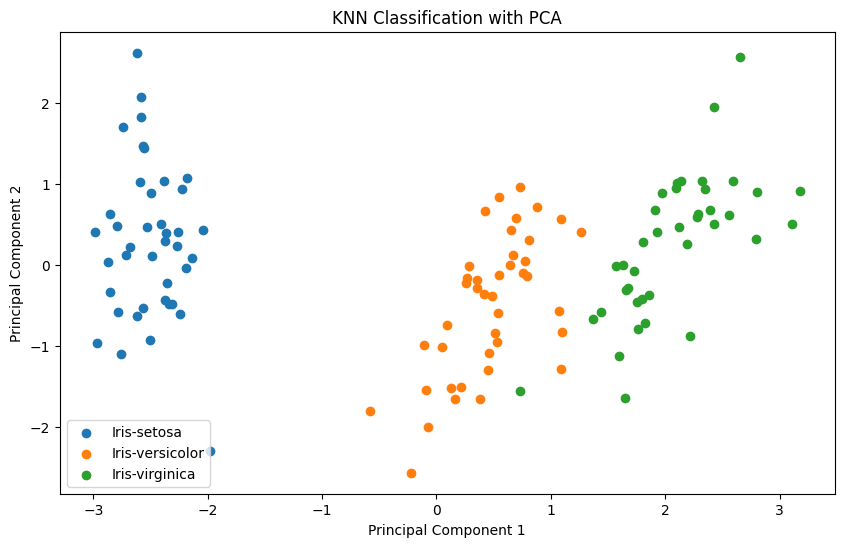

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Menerapkan PCA untuk mengurangi dimensi menjadi 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model
knn.fit(X_train_pca, y_train)

# Visualisasi hasil klasifikasi menggunakan scatter plot
plt.figure(figsize=(10, 6))
for species in iris_df['Species'].unique():
    plt.scatter(X_train_pca[y_train == species, 0], X_train_pca[y_train == species, 1], label=species)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Classification with PCA')
plt.legend()
plt.show()

